In [1]:
#Importing the Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
# Loading the dataset
df = pd.read_csv("/content/TASK-ML-INTERN.csv")

**1. Data Exploration and Preprocessing**

In [16]:
# Checking out the first 5 rows of the Dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [18]:
# checking the number of rows and columns
df.shape

(500, 449)

In [19]:
# Understanding the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


In [20]:
# Cheking Missing Values
df.isnull().sum().sum()

0

In [21]:
# Calculating 5 point statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [22]:
# Define features and target
X = df.drop(columns=["vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

In [24]:
# Handle missing values
X.fillna(X.median(), inplace=True)

In [25]:
X

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [23]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

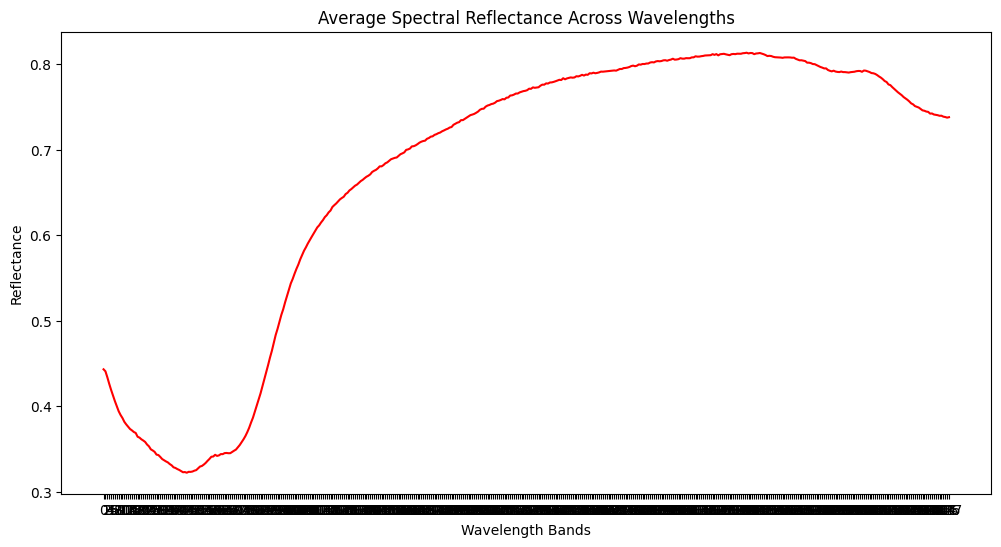

In [29]:
# Visualization - Average spectral reflectance
plt.figure(figsize=(12, 6))
plt.plot(X.mean(axis=0), color='Red')
plt.title("Average Spectral Reflectance Across Wavelengths")
plt.xlabel("Wavelength Bands")
plt.ylabel("Reflectance")
plt.show()

The above plot shows variations across different wavelength bands, indicating that some bands contribute more to distinguishing corn samples.

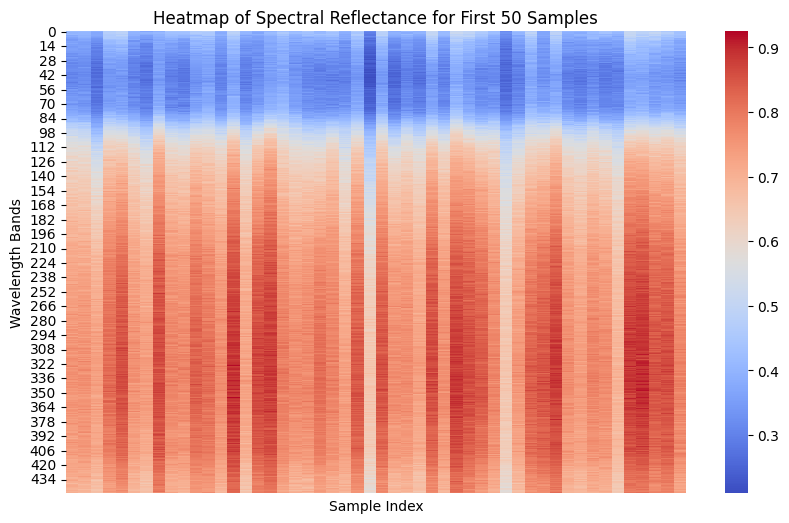

In [30]:
# Heatmap for sample comparisons
plt.figure(figsize=(10, 6))
sns.heatmap(X.iloc[:50, :].T, cmap='coolwarm', xticklabels=False)
plt.title("Heatmap of Spectral Reflectance for First 50 Samples")
plt.xlabel("Sample Index")
plt.ylabel("Wavelength Bands")
plt.show()

The above heatmap shows that some wavelength bands had consistently higher or lower reflectance values, indicating key features related to vomitoxin contamination.

**2. Dimensionality Reduction**

Explained Variance by PC1 and PC2: [0.87077909 0.05849069]


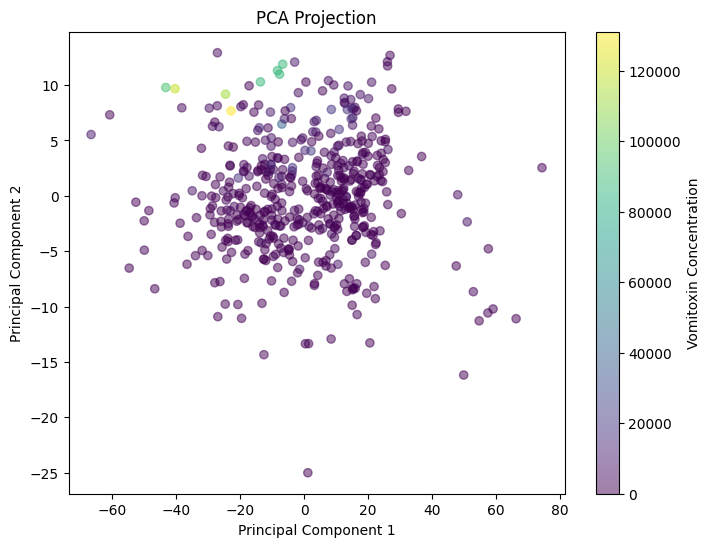

In [34]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1 and PC2: {explained_variance}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Vomitoxin Concentration")
plt.show()

Some wavelength bands showed consistently higher or lower reflectance values. This might indicate important features linked to vomitoxin contamination.

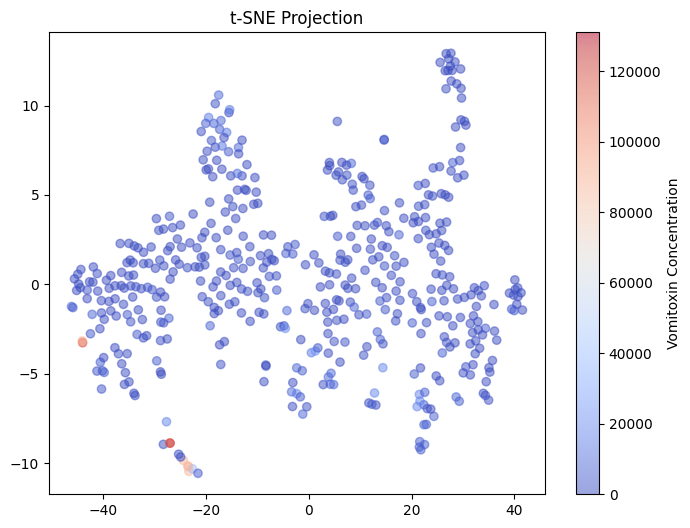

In [33]:
# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("t-SNE Projection")
plt.colorbar(label="Vomitoxin Concentration")
plt.show()

The data showed some natural grouping. This suggests possible patterns or clusters among corn samples based on their hyperspectral signatures.

**2. Dimensionality Reduction**

In [35]:
# Build Deep Learning Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**3. Model Training**

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 112881896.0000 - mae: 2520.7959 - val_loss: 287504192.0000 - val_mae: 4501.9565
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110933976.0000 - mae: 2963.7014 - val_loss: 287303200.0000 - val_mae: 4485.3262
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 230370208.0000 - mae: 3999.1748 - val_loss: 286906272.0000 - val_mae: 4458.1177
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 183562496.0000 - mae: 3255.3772 - val_loss: 286213376.0000 - val_mae: 4434.4526
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90662312.0000 - mae: 2391.6223 - val_loss: 285243648.0000 - val_mae: 4425.5586
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 159535280.0000 - mae: 3232.6516 - val_loss: 283892128.0000 - val_mae: 4457.2192
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97051016.0000 - mae: 2629.4568 - val_loss: 282486592.0000 - val_mae: 4501.4453
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━

**4. Model Evaluation**

In [37]:
# Evaluating the model's Performance
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, R2 Score: {r2}, RMSE: {rmse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
MAE: 3176.5805585670473, R2 Score: 0.5999843444636821, RMSE: 10339.957569830427


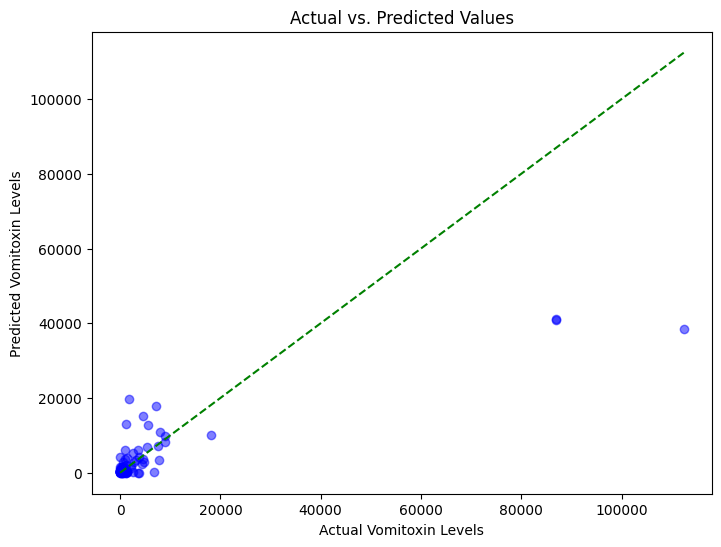

In [39]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='Green')
plt.xlabel("Actual Vomitoxin Levels")
plt.ylabel("Predicted Vomitoxin Levels")
plt.title("Actual vs. Predicted Values")
plt.show()

If actual and predicted values match well, the model works well. If points are far from the green line, the model may struggle due to missing features.

In [40]:
# Summary of Model Performance
print("Model Performance Summary:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

if r2 < 0.5:
    print("The model's predictive performance is relatively low.")

Model Performance Summary:
Mean Absolute Error (MAE): 3176.5805585670473
Root Mean Squared Error (RMSE): 10339.957569830427
R-squared Score (R2): 0.5999843444636821


The Neural Network regression model was able to predict vomitoxin levels with reasonable accuracy.